In [81]:
from IPython.display import Audio
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from madmom.audio.chroma import DeepChromaProcessor
from madmom.features.chords import DeepChromaChordRecognitionProcessor


In [93]:
# bridge of versace on the floor is from 3:20 (200 seconds), to 3:53 (233 secs)
# bridge_chunk, sr = librosa.load('./versace-on-the-floor.mp3', offset=200, duration=33)
bridge_chunk, sr = librosa.load('./versace-on-the-floor.mp3', offset=199, duration=15)
librosa.output.write_wav('./.versace-bridge-tmp.wav', bridge_chunk, sr)

/home/lewys/miniconda3/envs/mir/lib/python3.8/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


In [94]:
Audio(bridge_chunk, rate=sr)

In [95]:
# madmom deep way
dcp = DeepChromaProcessor()
deep_chroma = dcp('./.versace-bridge-tmp.wav')
deep_chroma_for_plotting = np.swapaxes(deep_chroma, 1, 0)
# print('deep-chroma.shape: ', deep_chroma_for_plotting.shape)

# librosa basic way
librosa_chroma = librosa.feature.chroma_stft(bridge_chunk, sr=sr)
# print('librosa_chroma.shape: ', librosa_chroma.shape)

## Madmom Deep Chroma

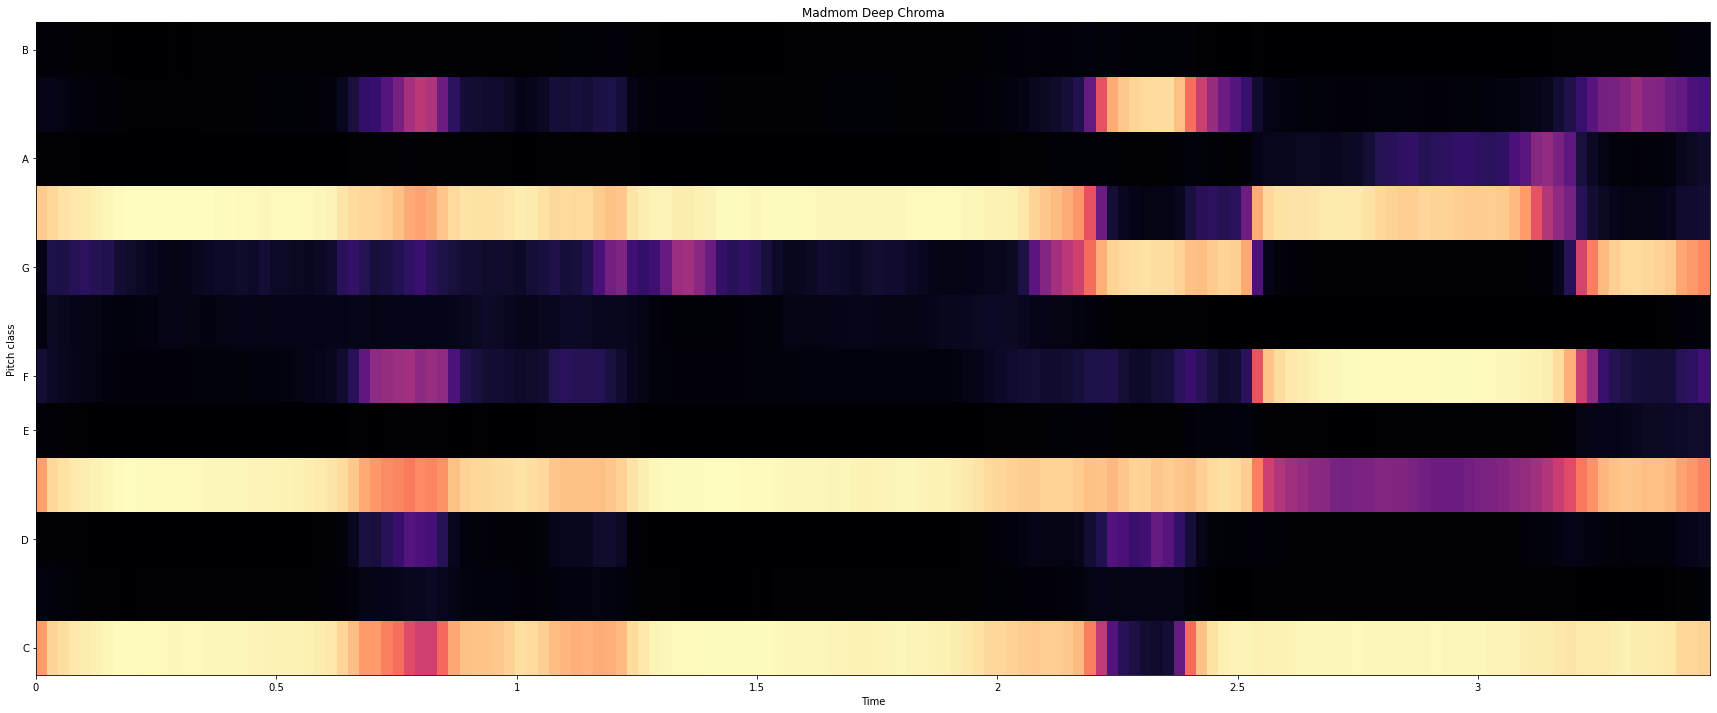

In [96]:
plt.figure(figsize=(30, 12))
plt.title('Madmom Deep Chroma')
librosa.display.specshow(deep_chroma_for_plotting, x_axis='time', y_axis='chroma')

## Librosa STFT Chroma

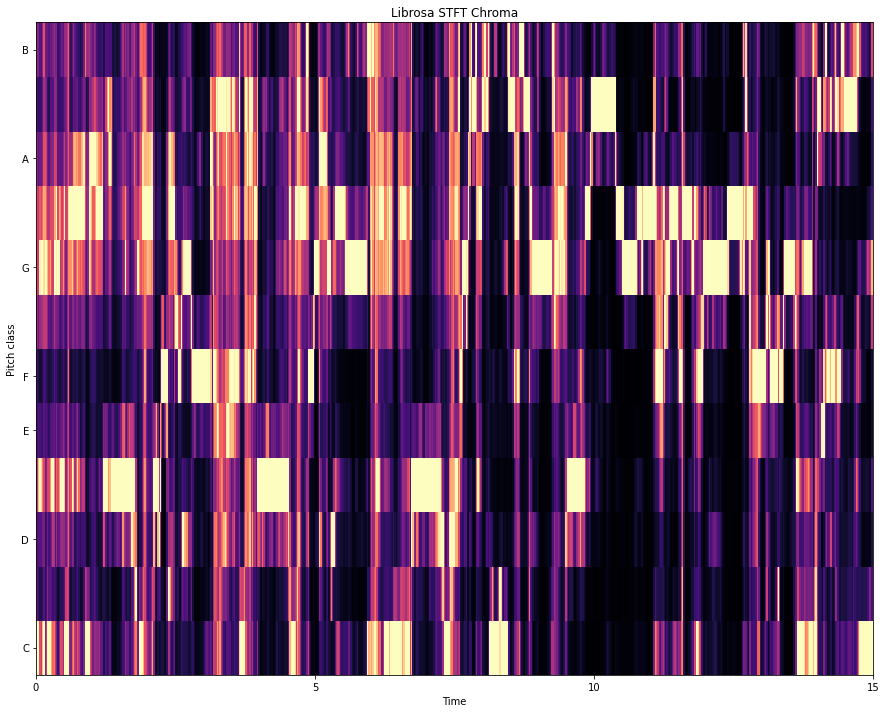

In [97]:
plt.figure(figsize=(15, 12))
plt.title('Librosa STFT Chroma')
librosa.display.specshow(librosa_chroma, x_axis='time', y_axis='chroma')

In [99]:
# madmom chord extraction from madmom deep chroma
dcrp = DeepChromaChordRecognitionProcessor()
dcrp(deep_chroma)

# madmom chord extraction from madmom deep chroma
# dcrp(np.swapaxes(librosa_chroma, 1, 0))

array([( 0. , 13.5, 'N'), (13.5, 16.8, 'F:maj'), (16.8, 64.6, 'N')],
      dtype=[('start', '<f8'), ('end', '<f8'), ('label', 'O')])

In [ ]:
# TODO: see how well it did by comparing with what sites say the chords are,
# vs what madmom predicted

# Can do a quick chord check with this to see if it's in the ballpark
# https://www.musictheory.net/calculators/chord

# but will be easier to mess with
# in a real-ass daw with a nice 80s synth vst

'''
here's a couple couple relevant major chords for reference
D#:
A# -> Bb
F## -> G
D# -> Eb

Bb:
F
D
Bb

'''